# GitHub Advisories Analysis

## Setup and data loading

### Import dependencies

In [2]:
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
%config InlineBackend.figure_format = "retina"

### Load advisories and affected packages from sqlite

In [3]:
conn = sqlite3.connect("data/advisory-database.db")

In [4]:
pd.read_sql_query("PRAGMA table_info(advisories)", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,ghsa,TEXT,0,None,1
1,1,schema_version,TEXT,0,None,0
2,2,modified,TEXT,1,None,0
3,3,published,TEXT,0,None,0
4,4,withdrawn,TEXT,0,None,0
5,5,cve,TEXT,0,None,0
6,6,ecosystems,TEXT,0,None,0
7,7,summary,TEXT,0,None,0
8,8,details,TEXT,0,None,0
9,9,severity,TEXT,0,None,0


In [6]:
pd.read_sql_query("SELECT * FROM advisories WHERE cve LIKE 'CVE-2025-%' LIMIT 100", conn)

,ghsa,schema_version,modified,published,withdrawn,cve,ecosystems,summary,details,severity,cwes,github_reviewed,github_reviewed_at,nvd_published_at,ref_commits,ref_pull_requests
0,GHSA-q4j8-27ch-xj8q,1.4.0,2025-04-04T18:30:59Z,2025-04-04T18:30:59Z,None,CVE-2025-32169,None,None,Improper Neutralization of Input During Web Pa...,MODERATE,"[""CWE-79""]",0,None,"""2025-04-04T16:15:25Z""",None,None
1,GHSA-cf2m-x5fh-hrjc,1.4.0,2025-04-01T03:31:33Z,2025-04-01T03:31:33Z,None,CVE-2025-31523,None,None,Rejected reason: Not used,None,[],0,None,"""2025-04-01T03:15:18Z""",None,None
2,GHSA-r67p-5vv5-qw2q,1.4.0,2025-04-01T15:31:43Z,2025-04-01T15:31:43Z,None,CVE-2025-31847,None,None,Improper Neutralization of Input During Web Pa...,MODERATE,"[""CWE-79""]",0,None,"""2025-04-01T15:16:25Z""",None,None
3,GHSA-v9fr-mwf9-jjvx,1.4.0,2025-04-04T18:31:05Z,2025-04-04T18:31:05Z,None,CVE-2025-32268,None,None,Cross-Site Request Forgery (CSRF) vulnerabilit...,MODERATE,"[""CWE-352""]",0,None,"""2025-04-04T16:15:37Z""",None,None
4,GHSA-cqmw-qrqr-v255,1.4.0,2025-04-05T21:30:23Z,2025-04-05T21:30:23Z,None,CVE-2025-32360,None,None,"In Zammad 6.4.x before 6.4.2, there is informa...",MODERATE,"[""CWE-402""]",0,None,"""2025-04-05T21:15:40Z""",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GHSA-c83m-3729-3q38,1.4.0,2025-04-17T18:31:16Z,2025-04-17T18:31:16Z,None,CVE-2025-32530,None,None,Improper Neutralization of Input During Web Pa...,HIGH,"[""CWE-79""]",0,None,"""2025-04-17T16:15:41Z""",None,None
96,GHSA-rxcr-p59f-9j2p,1.4.0,2025-04-17T18:31:20Z,2025-04-17T18:31:20Z,None,CVE-2025-39464,None,None,Improper Neutralization of Input During Web Pa...,HIGH,"[""CWE-79""]",0,None,"""2025-04-17T16:15:56Z""",None,None
97,GHSA-93hf-9xg9-w4v7,1.4.0,2025-04-01T15:31:39Z,2025-04-01T15:31:38Z,None,CVE-2025-31766,None,None,Improper Neutralization of Input During Web Pa...,MODERATE,"[""CWE-79""]",0,None,"""2025-04-01T15:16:13Z""",None,None
98,GHSA-hc93-f59p-5vw6,1.4.0,2025-04-12T09:30:31Z,2025-04-12T09:30:31Z,None,CVE-2025-3292,None,None,The User Registration & Membership – Custom Re...,MODERATE,"[""CWE-639""]",0,None,"""2025-04-12T07:15:27Z""",None,None


In [7]:
advisories = pd.read_sql_query(
    "SELECT ghsa, published, modified, cve, severity, cwes FROM advisories",
    conn,
    parse_dates=["published", "modified"],
)
advisories.cwes = advisories.cwes.apply(lambda v: frozenset(json.loads(v)))
print(advisories.shape[0], 'rows')
advisories.head()

275610 rows


,ghsa,published,modified,cve,severity,cwes
0,GHSA-639p-pgpg-5qr5,2024-11-08 06:30:49+00:00,2024-12-11 18:30:37+00:00,CVE-2024-50191,MODERATE,()
1,GHSA-362g-36hp-r4hp,2024-11-12 21:30:55+00:00,2024-11-12 21:30:55+00:00,CVE-2024-49509,HIGH,"(CWE-122, CWE-787)"
2,GHSA-qp4r-vr9j-jg3p,2024-11-22 21:32:19+00:00,2024-11-22 21:32:20+00:00,CVE-2024-9715,HIGH,(CWE-416)
3,GHSA-ffgw-jxv7-9vp7,2024-11-12 21:30:52+00:00,2024-11-12 21:30:52+00:00,CVE-2024-45114,HIGH,(CWE-787)
4,GHSA-5jf7-53jh-gpxm,2024-11-13 00:30:48+00:00,2024-11-13 18:31:59+00:00,CVE-2024-28728,MODERATE,(CWE-79)


In [8]:
packages = pd.read_sql_query("SELECT ghsa, name AS package, ecosystem FROM affected_packages", conn)
print(packages.shape[0], 'rows')
packages.head()

33141 rows


,ghsa,package,ecosystem
0,GHSA-4pqg-hr8r-h5cw,mediawiki/core,Packagist
1,GHSA-3pqh-mpvw-5fr2,org.apache.cloudstack:cloudstack,Maven
2,GHSA-23wx-cgxq-vpwx,dset,npm
3,GHSA-23wx-cgxq-vpwx,org.webjars.npm:dset,Maven
4,GHSA-jgpm-2862-q5m8,org.jenkins-ci.plugins:script-security,Maven


In [5]:
conn.close()

### Load CWE definitions from MITRE CSVs

In [9]:
cwes = pd.concat([pd.read_csv("data/cwes/699.csv"), pd.read_csv("data/cwes/1000.csv"), pd.read_csv("data/cwes/1194.csv")]).drop_duplicates()
cwes = cwes[['CWE-ID']].rename(columns={'CWE-ID': 'cwe_name'}).reset_index(names='cwe_id')
cwes.cwe_id = cwes.cwe_id.apply(lambda i: f"CWE-{i:d}")
cwes.head()

,cwe_id,cwe_name
0,CWE-15,External Control of System or Configuration Se...
1,CWE-22,Improper Limitation of a Pathname to a Restric...
2,CWE-41,Improper Resolution of Path Equivalence
3,CWE-59,Improper Link Resolution Before File Access ('...
4,CWE-66,Improper Handling of File Names that Identify ...


## Advisory severity by ecosystem

In [10]:
package_vulns = pd.merge(packages, advisories, on="ghsa").drop_duplicates()
print(package_vulns.shape)
package_vulns.head()

(22803, 8)


,ghsa,package,ecosystem,published,modified,cve,severity,cwes
0,GHSA-4pqg-hr8r-h5cw,mediawiki/core,Packagist,2023-09-25 18:30:50+00:00,2024-06-10 18:30:50+00:00,CVE-2023-3550,HIGH,(CWE-79)
1,GHSA-3pqh-mpvw-5fr2,org.apache.cloudstack:cloudstack,Maven,2022-05-17 05:12:26+00:00,2025-04-11 04:06:39+00:00,CVE-2012-5616,LOW,()
2,GHSA-23wx-cgxq-vpwx,dset,npm,2022-05-03 00:00:45+00:00,2022-05-20 20:13:33+00:00,CVE-2022-25645,MODERATE,(CWE-1321)
3,GHSA-23wx-cgxq-vpwx,org.webjars.npm:dset,Maven,2022-05-03 00:00:45+00:00,2022-05-20 20:13:33+00:00,CVE-2022-25645,MODERATE,(CWE-1321)
4,GHSA-jgpm-2862-q5m8,org.jenkins-ci.plugins:script-security,Maven,2022-05-13 01:15:21+00:00,2023-10-25 23:10:06+00:00,CVE-2019-1003024,HIGH,()


In [11]:
severity_order = ["LOW", "MODERATE", "HIGH", "CRITICAL"]
package_vulns.severity.value_counts().reindex(severity_order)

severity
LOW          1164
MODERATE    10352
HIGH         7960
CRITICAL     3327
Name: count, dtype: int64

<Axes: xlabel='year'>

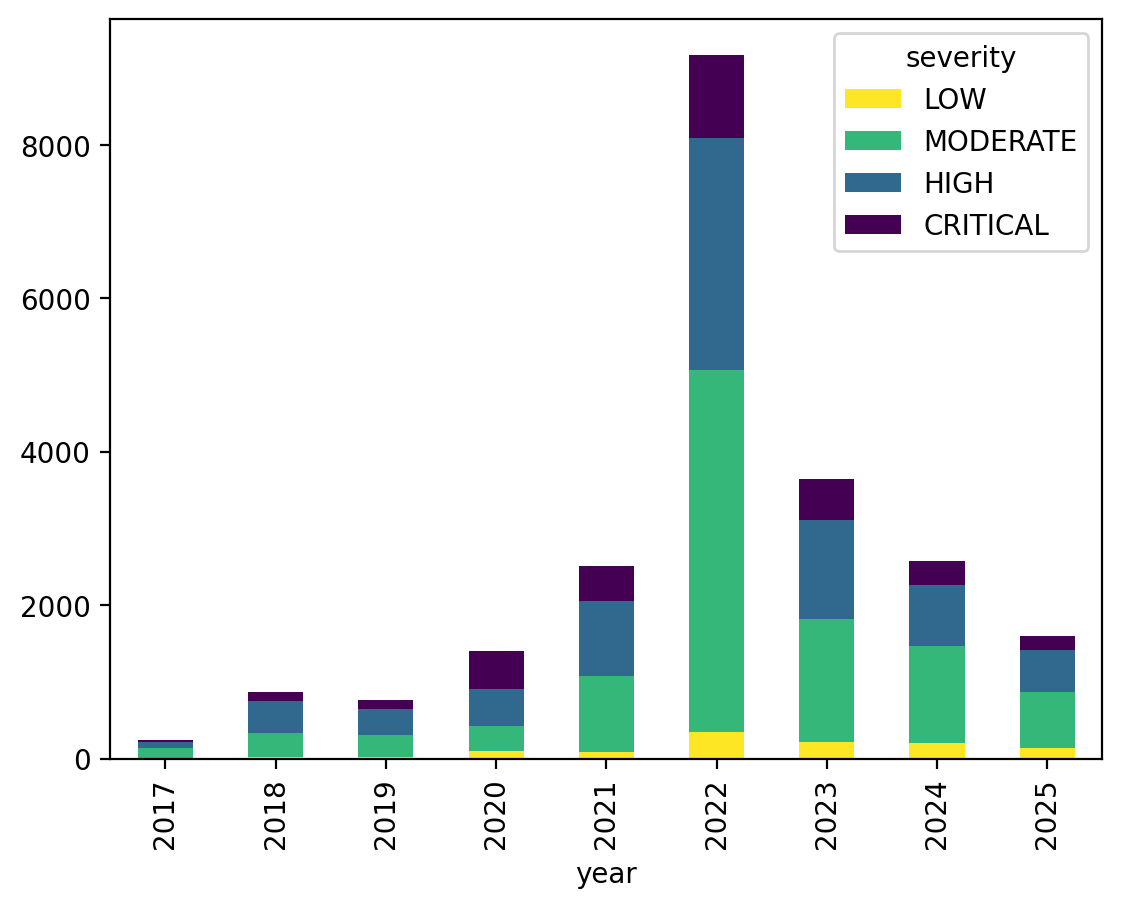

In [12]:
vulns_by_year = package_vulns.assign(year=package_vulns.published.dt.year).groupby("year")
color_map = matplotlib.colormaps['viridis'].reversed()
vulns_by_year.severity.value_counts().unstack()[severity_order].plot(kind="bar", stacked=True, colormap=color_map)

## Top CWEs by ecosystem

In [13]:
cwe_counts = package_vulns.explode('cwes').rename(columns={'cwes': 'cwe_id'}).groupby(['ecosystem', 'cwe_id'])['ghsa'].count().reset_index()
cwe_counts = cwe_counts.rename(columns={'ghsa': 'count'})
cwe_counts = cwe_counts.sort_values(['ecosystem', 'count'], ascending=False).groupby('ecosystem').head(5)
pd.merge(cwe_counts, cwes, on='cwe_id').sort_values(['ecosystem', 'count'], ascending=False)

,ecosystem,cwe_id,count,cwe_name
0,npm,CWE-79,551,Improper Neutralization of Input During Web Pa...
1,npm,CWE-506,386,Embedded Malicious Code
2,npm,CWE-1321,358,Improperly Controlled Modification of Object P...
3,npm,CWE-22,297,Improper Limitation of a Pathname to a Restric...
4,npm,CWE-400,261,Uncontrolled Resource Consumption
5,crates.io,CWE-362,78,Concurrent Execution using Shared Resource wit...
6,crates.io,CWE-787,52,Out-of-bounds Write
7,crates.io,CWE-416,51,Use After Free
8,crates.io,CWE-908,41,Use of Uninitialized Resource
9,crates.io,CWE-400,34,Uncontrolled Resource Consumption


## Commit and PR associations by ecosystem

In [16]:
# Reconnect to database to get commit/PR data
conn = sqlite3.connect("data/advisory-database.db")

# Load advisories with commit and PR references for ecosystems that are not null
advisories_with_refs = pd.read_sql_query("""
    SELECT DISTINCT a.ghsa, a.ref_commits, a.ref_pull_requests, ap.ecosystem
    FROM advisories a
    JOIN affected_packages ap ON a.ghsa = ap.ghsa
    WHERE ap.ecosystem IS NOT NULL AND ap.ecosystem != ''
""", conn)

print(f"Total advisories with non-null ecosystems: {advisories_with_refs.shape[0]}")
advisories_with_refs.head()

Total advisories with non-null ecosystems: 19529


,ghsa,ref_commits,ref_pull_requests,ecosystem
0,GHSA-4pqg-hr8r-h5cw,None,None,Packagist
1,GHSA-3pqh-mpvw-5fr2,None,None,Maven
2,GHSA-23wx-cgxq-vpwx,None,None,npm
3,GHSA-23wx-cgxq-vpwx,None,None,Maven
4,GHSA-jgpm-2862-q5m8,"[""https://github.com/jenkinsci/script-security...",None,Maven


In [17]:
# Analyze commit and PR associations
advisories_with_refs['has_commits'] = advisories_with_refs['ref_commits'].notna() & (advisories_with_refs['ref_commits'] != '[]')
advisories_with_refs['has_prs'] = advisories_with_refs['ref_pull_requests'].notna() & (advisories_with_refs['ref_pull_requests'] != '[]')
advisories_with_refs['has_commits_or_prs'] = advisories_with_refs['has_commits'] | advisories_with_refs['has_prs']

# Summary statistics
total_with_commits = advisories_with_refs['has_commits'].sum()
total_with_prs = advisories_with_refs['has_prs'].sum()
total_with_either = advisories_with_refs['has_commits_or_prs'].sum()
total_advisories = len(advisories_with_refs)

# Create summary DataFrame
summary_stats = pd.DataFrame({
    'Metric': [
        'Advisories with commits',
        'Advisories with PRs', 
        'Advisories with commits or PRs',
        'Total advisories (non-null ecosystem)'
    ],
    'Count': [total_with_commits, total_with_prs, total_with_either, total_advisories],
    'Percentage': [
        f"{total_with_commits/total_advisories*100:.1f}%" if total_advisories > 0 else "0.0%",
        f"{total_with_prs/total_advisories*100:.1f}%" if total_advisories > 0 else "0.0%", 
        f"{total_with_either/total_advisories*100:.1f}%" if total_advisories > 0 else "0.0%",
        "100.0%"
    ]
})

summary_stats

,Metric,Count,Percentage
0,Advisories with commits,9781,50.1%
1,Advisories with PRs,2839,14.5%
2,Advisories with commits or PRs,10976,56.2%
3,Total advisories (non-null ecosystem),19529,100.0%


In [18]:
# Breakdown by ecosystem
ecosystem_stats = advisories_with_refs.groupby('ecosystem').agg({
    'ghsa': 'count',
    'has_commits': 'sum',
    'has_prs': 'sum', 
    'has_commits_or_prs': 'sum'
}).rename(columns={
    'ghsa': 'total_advisories',
    'has_commits': 'advisories_with_commits',
    'has_prs': 'advisories_with_prs',
    'has_commits_or_prs': 'advisories_with_commits_or_prs'
})

# Calculate percentages
ecosystem_stats['pct_with_commits'] = (ecosystem_stats['advisories_with_commits'] / ecosystem_stats['total_advisories'] * 100).round(1)
ecosystem_stats['pct_with_prs'] = (ecosystem_stats['advisories_with_prs'] / ecosystem_stats['total_advisories'] * 100).round(1)
ecosystem_stats['pct_with_commits_or_prs'] = (ecosystem_stats['advisories_with_commits_or_prs'] / ecosystem_stats['total_advisories'] * 100).round(1)

# Sort by total advisories
ecosystem_stats = ecosystem_stats.sort_values('total_advisories', ascending=False)
ecosystem_stats

,total_advisories,advisories_with_commits,advisories_with_prs,advisories_with_commits_or_prs,pct_with_commits,pct_with_prs,pct_with_commits_or_prs
ecosystem,,,,,,,
Maven,5363,2332,509,2611,43.5,9.5,48.7
Packagist,4282,2401,322,2533,56.1,7.5,59.2
npm,3679,1623,641,1871,44.1,17.4,50.9
Go,1984,1149,519,1347,57.9,26.2,67.9
PyPI,1772,1081,316,1196,61.0,17.8,67.5
crates.io,868,332,213,447,38.2,24.5,51.5
RubyGems,860,473,147,542,55.0,17.1,63.0
NuGet,659,348,160,382,52.8,24.3,58.0
Hex,29,18,6,20,62.1,20.7,69.0


In [21]:
# Year-by-year analysis of commit and PR associations
# First, we need to get the published dates for advisories
advisories_with_dates = pd.read_sql_query("""
    SELECT DISTINCT a.ghsa, a.published, a.ref_commits, a.ref_pull_requests, ap.ecosystem
    FROM advisories a
    JOIN affected_packages ap ON a.ghsa = ap.ghsa
    WHERE ap.ecosystem IS NOT NULL AND ap.ecosystem != ''
    AND a.published IS NOT NULL
""", conn, parse_dates=["published"])

# Add year column and commit/PR flags
advisories_with_dates['year'] = advisories_with_dates['published'].dt.year
advisories_with_dates['has_commits'] = advisories_with_dates['ref_commits'].notna() & (advisories_with_dates['ref_commits'] != '[]')
advisories_with_dates['has_prs'] = advisories_with_dates['ref_pull_requests'].notna() & (advisories_with_dates['ref_pull_requests'] != '[]')
advisories_with_dates['has_commits_or_prs'] = advisories_with_dates['has_commits'] | advisories_with_dates['has_prs']

# Group by year for analysis
yearly_stats = advisories_with_dates.groupby('year').agg({
    'ghsa': 'count',
    'has_commits': 'sum',
    'has_prs': 'sum',
    'has_commits_or_prs': 'sum'
}).rename(columns={
    'ghsa': 'total_advisories',
    'has_commits': 'advisories_with_commits',
    'has_prs': 'advisories_with_prs', 
    'has_commits_or_prs': 'advisories_with_commits_or_prs'
})

# Calculate percentages
yearly_stats['pct_with_commits'] = (yearly_stats['advisories_with_commits'] / yearly_stats['total_advisories'] * 100).round(1)
yearly_stats['pct_with_prs'] = (yearly_stats['advisories_with_prs'] / yearly_stats['total_advisories'] * 100).round(1)
yearly_stats['pct_with_commits_or_prs'] = (yearly_stats['advisories_with_commits_or_prs'] / yearly_stats['total_advisories'] * 100).round(1)

# Filter to recent years with meaningful data (2018 onwards)
yearly_stats_recent = yearly_stats[yearly_stats.index >= 2018]
yearly_stats_recent

,total_advisories,advisories_with_commits,advisories_with_prs,advisories_with_commits_or_prs,pct_with_commits,pct_with_prs,pct_with_commits_or_prs
year,,,,,,,
2018,702,231,84,270,32.9,12.0,38.5
2019,678,223,129,289,32.9,19.0,42.6
2020,1284,394,106,437,30.7,8.3,34.0
2021,2221,1067,461,1316,48.0,20.8,59.3
2022,7783,3933,987,4332,50.5,12.7,55.7
2023,3103,1731,548,1954,55.8,17.7,63.0
2024,2227,1386,319,1478,62.2,14.3,66.4
2025,1301,705,182,779,54.2,14.0,59.9


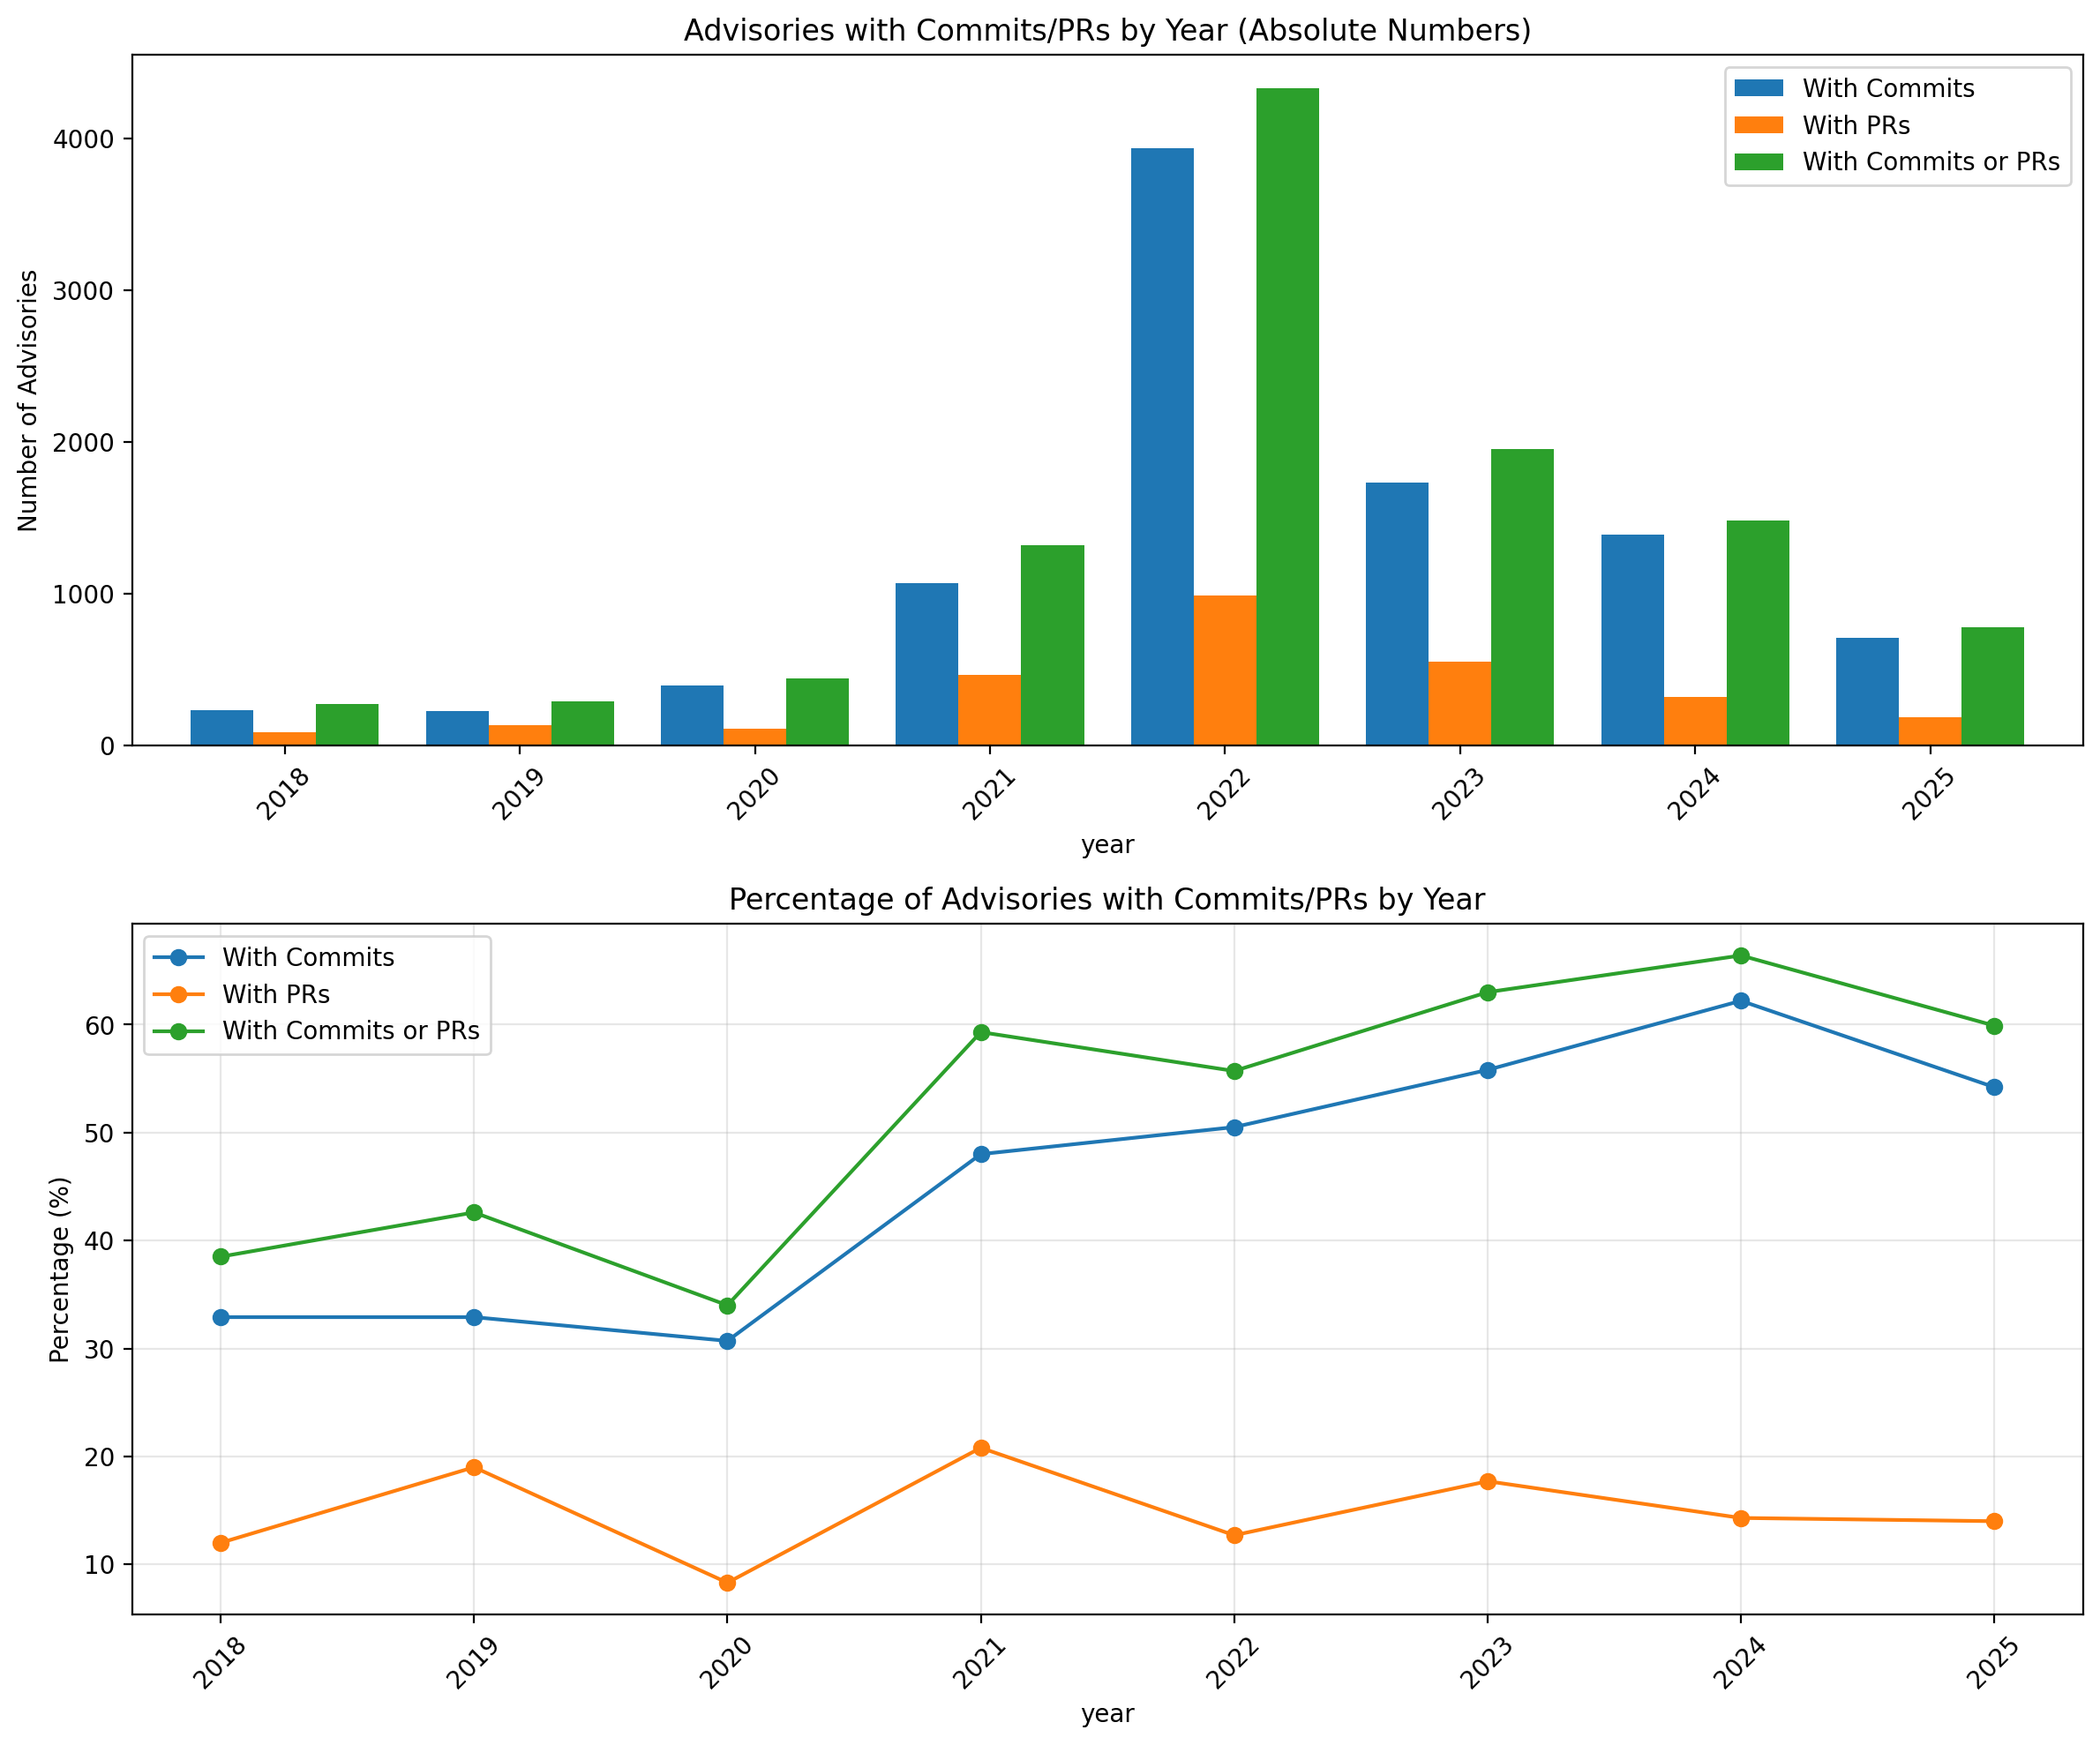

In [22]:
# Visualize the trends over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Absolute numbers
yearly_stats_recent[['advisories_with_commits', 'advisories_with_prs', 'advisories_with_commits_or_prs']].plot(
    kind='bar', ax=ax1, width=0.8
)
ax1.set_title('Advisories with Commits/PRs by Year (Absolute Numbers)')
ax1.set_ylabel('Number of Advisories')
ax1.legend(['With Commits', 'With PRs', 'With Commits or PRs'])
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Percentages
yearly_stats_recent[['pct_with_commits', 'pct_with_prs', 'pct_with_commits_or_prs']].plot(
    kind='line', ax=ax2, marker='o'
)
ax2.set_title('Percentage of Advisories with Commits/PRs by Year')
ax2.set_ylabel('Percentage (%)')
ax2.legend(['With Commits', 'With PRs', 'With Commits or PRs'])
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## CVE ecosystem breakdown by year with commit/PR analysis

In [39]:
# CVE ecosystem breakdown by year with commit/PR analysis
# First, get the set of GHSAs that have CVEs for efficient filtering
cve_ghsas = set(advisories.query('cve.notna()')['ghsa'].values)

# Filter for advisories with CVEs in 2025 only
cve_ecosystem_analysis = advisories_with_dates[
    (advisories_with_dates['year'] == 2025) & 
    (advisories_with_dates['ghsa'].isin(cve_ghsas))
].copy()

print(f"Total CVE advisories (2025): {len(cve_ecosystem_analysis)}")

# Group by year and ecosystem
ecosystem_year_stats = cve_ecosystem_analysis.groupby(['year', 'ecosystem']).agg({
    'ghsa': 'count',
    'has_commits': 'sum',
    'has_prs': 'sum',
    'has_commits_or_prs': 'sum'
}).rename(columns={
    'ghsa': 'total_cves',
    'has_commits': 'cves_with_commits',
    'has_prs': 'cves_with_prs',
    'has_commits_or_prs': 'cves_with_commits_or_prs'
})

# Calculate percentages within each ecosystem-year combination
ecosystem_year_stats['pct_with_commits'] = (ecosystem_year_stats['cves_with_commits'] / ecosystem_year_stats['total_cves'] * 100).round(1)
ecosystem_year_stats['pct_with_prs'] = (ecosystem_year_stats['cves_with_prs'] / ecosystem_year_stats['total_cves'] * 100).round(1)
ecosystem_year_stats['pct_with_commits_or_prs'] = (ecosystem_year_stats['cves_with_commits_or_prs'] / ecosystem_year_stats['total_cves'] * 100).round(1)

# Calculate ecosystem share within each year
yearly_totals = ecosystem_year_stats.groupby('year')['total_cves'].sum()
ecosystem_year_stats['ecosystem_share_pct'] = (
    ecosystem_year_stats['total_cves'] / 
    ecosystem_year_stats.index.get_level_values('year').map(yearly_totals) * 100
).round(1)

# Reset index for easier viewing
ecosystem_year_detailed = ecosystem_year_stats.reset_index()

# Show top ecosystems by total CVEs across all years
top_ecosystems = ecosystem_year_detailed.groupby('ecosystem')['total_cves'].sum().sort_values(ascending=False).head(8).index

# Filter to top ecosystems for cleaner display
ecosystem_year_top = ecosystem_year_detailed[ecosystem_year_detailed['ecosystem'].isin(top_ecosystems)]

print("CVE breakdown by top ecosystems and year:")
ecosystem_year_top.sort_values(['year', 'total_cves'], ascending=[True, False])

Total CVE advisories (2025): 1166
CVE breakdown by top ecosystems and year:


,year,ecosystem,total_cves,cves_with_commits,cves_with_prs,cves_with_commits_or_prs,pct_with_commits,pct_with_prs,pct_with_commits_or_prs,ecosystem_share_pct
6,2025,PyPI,262,144,40,154,55.0,15.3,58.8,22.5
1,2025,Go,245,138,33,152,56.3,13.5,62.0,21.0
3,2025,Maven,223,99,33,118,44.4,14.8,52.9,19.1
5,2025,Packagist,191,106,15,107,55.5,7.9,56.0,16.4
9,2025,npm,150,104,29,114,69.3,19.3,76.0,12.9
4,2025,NuGet,38,23,3,25,60.5,7.9,65.8,3.3
8,2025,crates.io,35,16,8,20,45.7,22.9,57.1,3.0
7,2025,RubyGems,15,13,1,13,86.7,6.7,86.7,1.3


In [53]:
# Create a pivot table for easier analysis - ecosystem share by year
ecosystem_share_pivot = ecosystem_year_top.pivot(index='ecosystem', columns='year', values='ecosystem_share_pct').fillna(0)
print("Ecosystem market share by year (% of CVEs):")
print(ecosystem_share_pivot.round(1))
print()

# Create summary for commit/PR coverage by ecosystem (average across years)
ecosystem_summary = ecosystem_year_top.groupby('ecosystem').agg({
    'total_cves': 'sum',
    'pct_with_commits': 'mean',
    'pct_with_prs': 'mean', 
    'pct_with_commits_or_prs': 'mean',
    'ecosystem_share_pct': 'mean'
}).round(1).sort_values('total_cves', ascending=False)

# Calculate overall percentages across all ecosystems for 2025
overall_2025_total = cve_ecosystem_analysis['ghsa'].count()
overall_2025_commits = cve_ecosystem_analysis['has_commits'].sum()
overall_2025_prs = cve_ecosystem_analysis['has_prs'].sum()
overall_2025_commits_or_prs = cve_ecosystem_analysis['has_commits_or_prs'].sum()

ecosystem_summary.columns = ['Total CVEs', 'Avg % with Commits', 'Avg % with PRs', 'Avg % with Commits/PRs', 'Avg Market Share %']
print("Summary by ecosystem (2025):")
print(f"Overall across all ecosystems - Commits: {(overall_2025_commits / overall_2025_total * 100):.1f}%, PRs: {(overall_2025_prs / overall_2025_total * 100):.1f}%, Commits/PRs: {(overall_2025_commits_or_prs / overall_2025_total * 100):.1f}%")
ecosystem_summary

Ecosystem market share by year (% of CVEs):
year       2025
ecosystem      
Go         21.0
Maven      19.1
NuGet       3.3
Packagist  16.4
PyPI       22.5
RubyGems    1.3
crates.io   3.0
npm        12.9

Summary by ecosystem (2025):
Overall across all ecosystems - Commits: 55.7%, PRs: 14.0%, Commits/PRs: 60.9%


,Total CVEs,Avg % with Commits,Avg % with PRs,Avg % with Commits/PRs,Avg Market Share %
ecosystem,,,,,
PyPI,262,55.0,15.3,58.8,22.5
Go,245,56.3,13.5,62.0,21.0
Maven,223,44.4,14.8,52.9,19.1
Packagist,191,55.5,7.9,56.0,16.4
npm,150,69.3,19.3,76.0,12.9
NuGet,38,60.5,7.9,65.8,3.3
crates.io,35,45.7,22.9,57.1,3.0
RubyGems,15,86.7,6.7,86.7,1.3


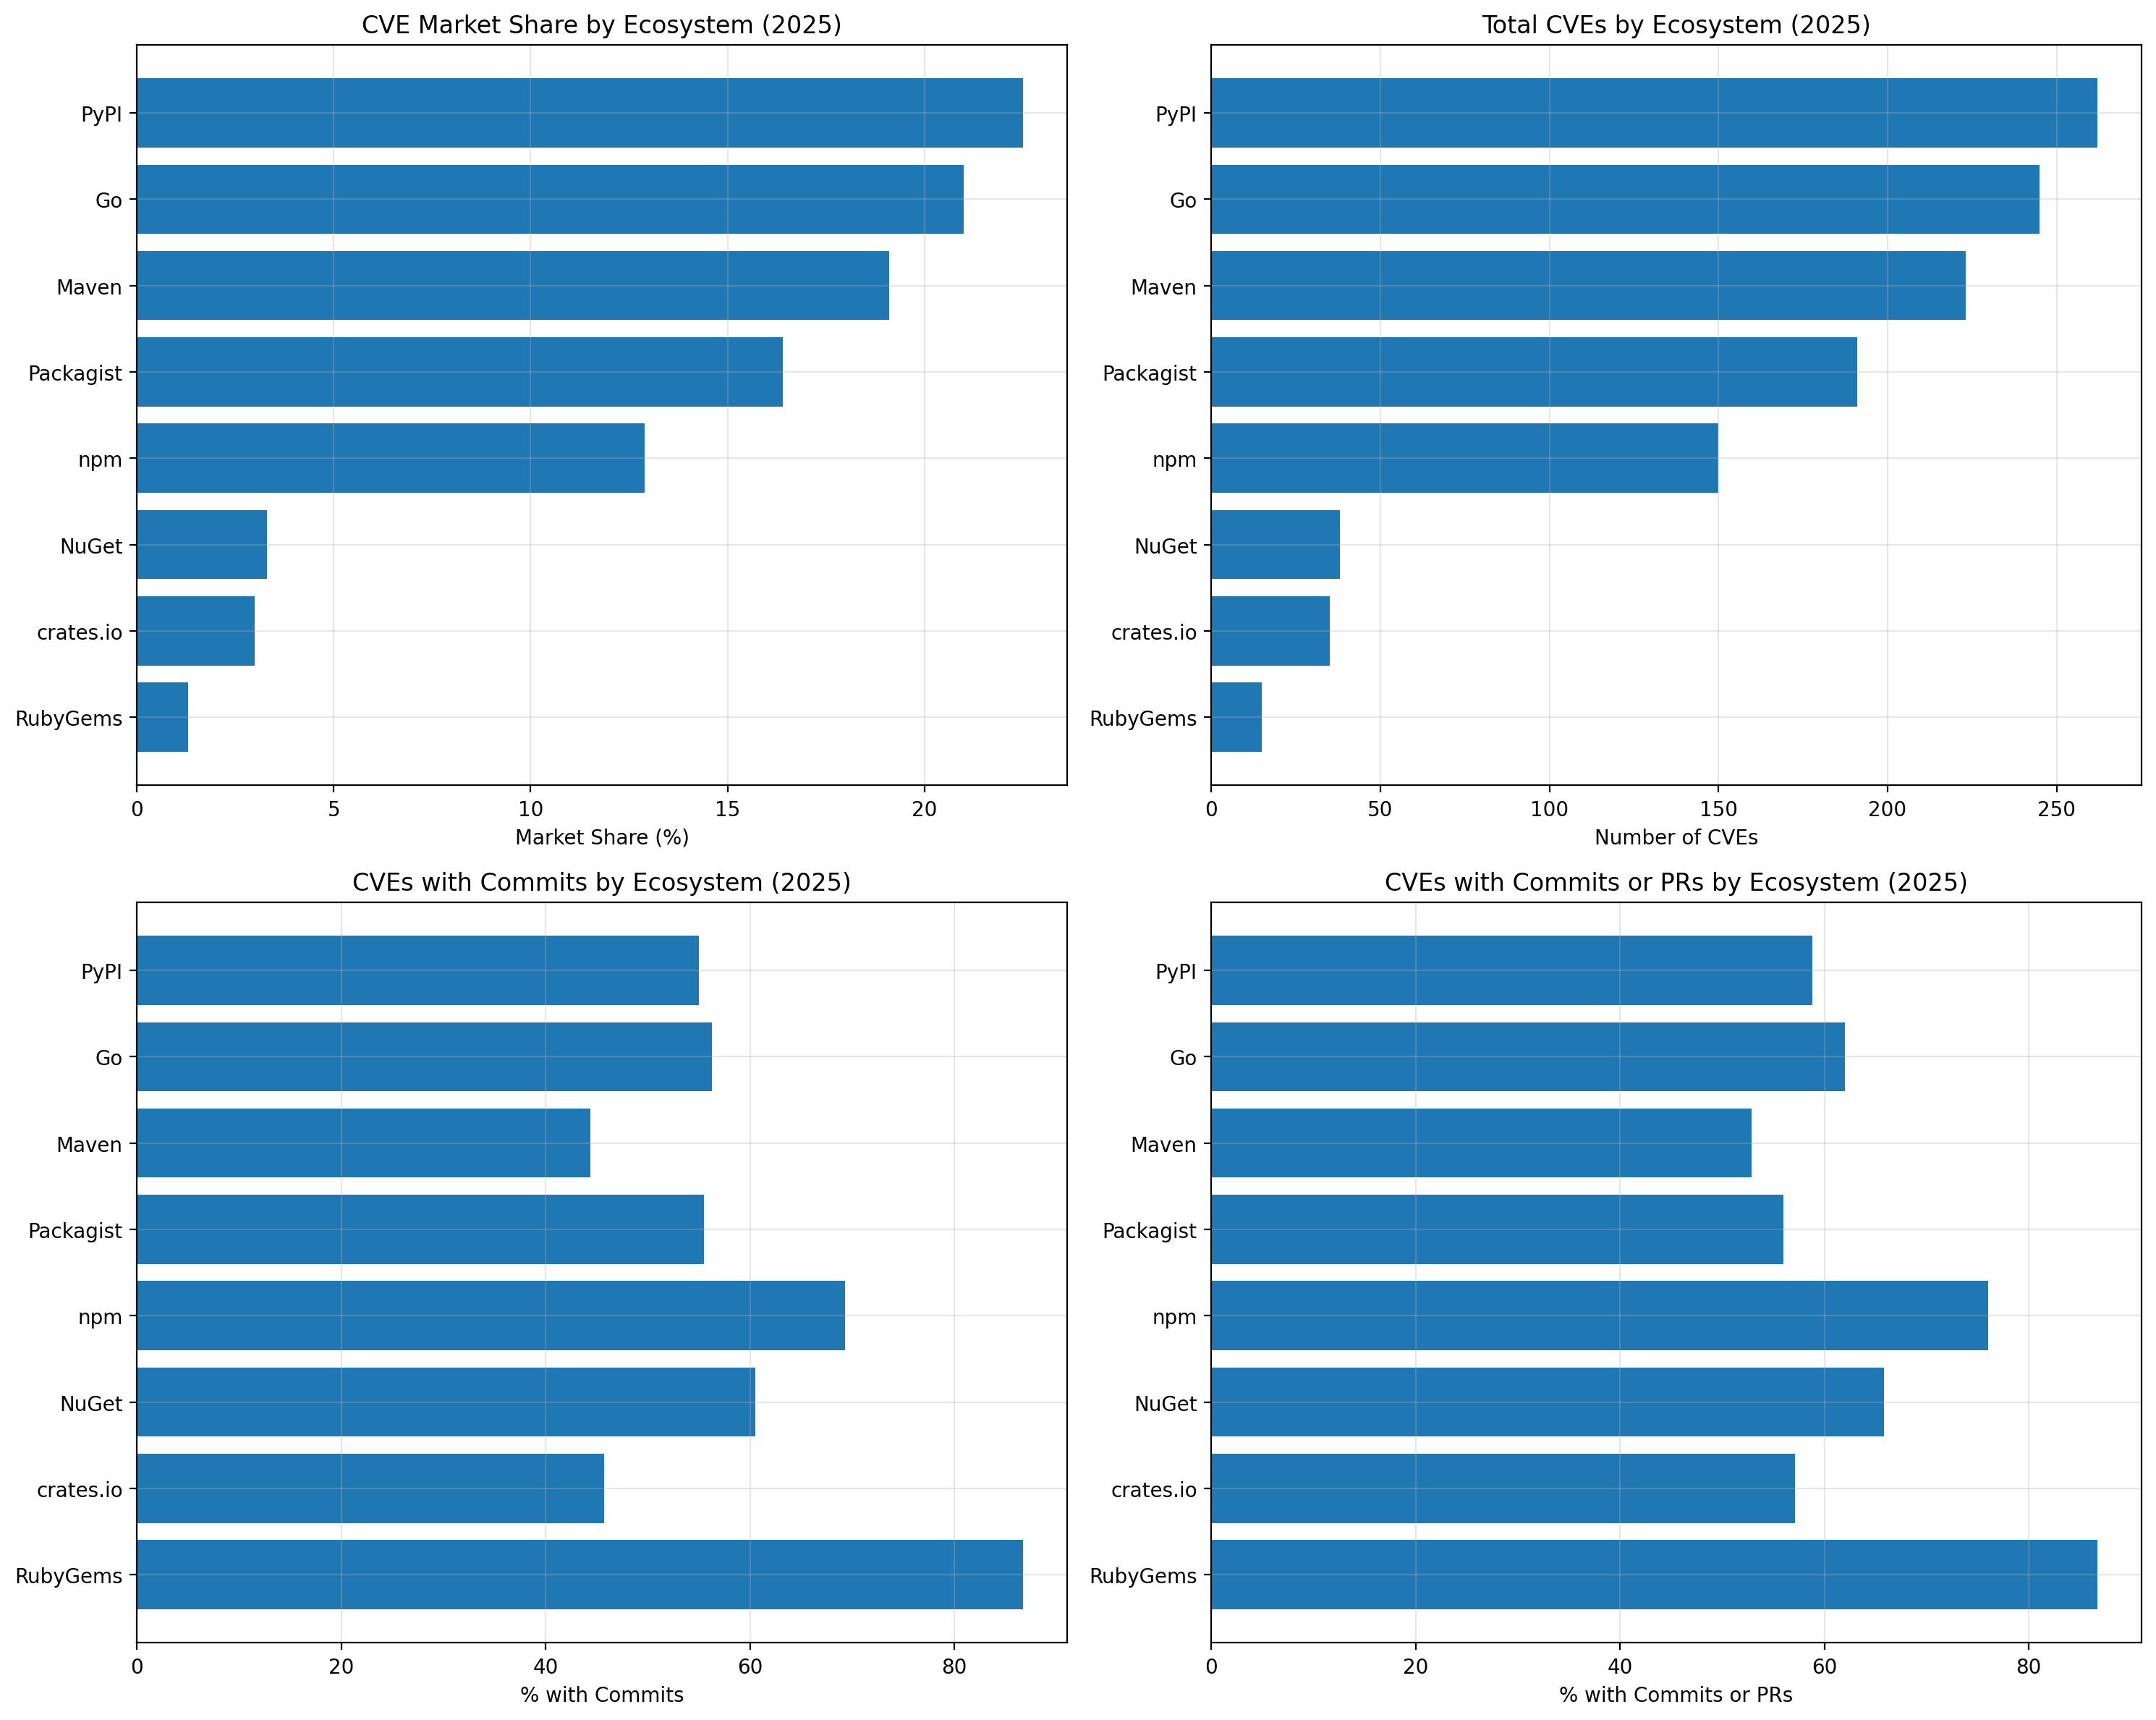

In [48]:
# Visualize 2025 CVE ecosystem data (single year analysis)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Since we only have 2025 data, create bar charts instead of line plots
ecosystem_summary_sorted = ecosystem_summary.sort_values('Total CVEs', ascending=True)

# 1. Market share by ecosystem (horizontal bar chart)
ax1.barh(ecosystem_summary_sorted.index, ecosystem_summary_sorted['Avg Market Share %'])
ax1.set_title('CVE Market Share by Ecosystem (2025)')
ax1.set_xlabel('Market Share (%)')
ax1.grid(True, alpha=0.3)

# 2. Total CVEs by ecosystem (horizontal bar chart)  
ax2.barh(ecosystem_summary_sorted.index, ecosystem_summary_sorted['Total CVEs'])
ax2.set_title('Total CVEs by Ecosystem (2025)')
ax2.set_xlabel('Number of CVEs')
ax2.grid(True, alpha=0.3)

# 3. Commit coverage by ecosystem
ax3.barh(ecosystem_summary_sorted.index, ecosystem_summary_sorted['Avg % with Commits'])
ax3.set_title('CVEs with Commits by Ecosystem (2025)')
ax3.set_xlabel('% with Commits')
ax3.grid(True, alpha=0.3)

# 4. Overall commit/PR coverage by ecosystem
ax4.barh(ecosystem_summary_sorted.index, ecosystem_summary_sorted['Avg % with Commits/PRs'])
ax4.set_title('CVEs with Commits or PRs by Ecosystem (2025)')
ax4.set_xlabel('% with Commits or PRs')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## CVE ecosystem trends across multiple years (2020-2025)

In [54]:
# Multi-year CVE ecosystem analysis (2020-2025)
# Filter for advisories with CVEs across multiple years
cve_multiyear_analysis = advisories_with_dates[
    (advisories_with_dates['year'] >= 2020) & 
    (advisories_with_dates['ghsa'].isin(cve_ghsas))
].copy()

print(f"Total CVE advisories (2020-2025): {len(cve_multiyear_analysis)}")

# Group by year and ecosystem for multi-year trends
multiyear_stats = cve_multiyear_analysis.groupby(['year', 'ecosystem']).agg({
    'ghsa': 'count',
    'has_commits': 'sum',
    'has_prs': 'sum',
    'has_commits_or_prs': 'sum'
}).rename(columns={
    'ghsa': 'total_cves',
    'has_commits': 'cves_with_commits',
    'has_prs': 'cves_with_prs',
    'has_commits_or_prs': 'cves_with_commits_or_prs'
})

# Calculate percentages
multiyear_stats['pct_with_commits'] = (multiyear_stats['cves_with_commits'] / multiyear_stats['total_cves'] * 100).round(1)
multiyear_stats['pct_with_prs'] = (multiyear_stats['cves_with_prs'] / multiyear_stats['total_cves'] * 100).round(1)
multiyear_stats['pct_with_commits_or_prs'] = (multiyear_stats['cves_with_commits_or_prs'] / multiyear_stats['total_cves'] * 100).round(1)

# Calculate ecosystem share within each year
yearly_totals_multi = multiyear_stats.groupby('year')['total_cves'].sum()
multiyear_stats['ecosystem_share_pct'] = (
    multiyear_stats['total_cves'] / 
    multiyear_stats.index.get_level_values('year').map(yearly_totals_multi) * 100
).round(1)

# Reset index and get top ecosystems
multiyear_detailed = multiyear_stats.reset_index()
top_ecosystems_multi = multiyear_detailed.groupby('ecosystem')['total_cves'].sum().sort_values(ascending=False).head(8).index
multiyear_top = multiyear_detailed[multiyear_detailed['ecosystem'].isin(top_ecosystems_multi)]

print("Multi-year CVE trends by top ecosystems:")
multiyear_top.sort_values(['year', 'total_cves'], ascending=[True, False]).head(10)

Total CVE advisories (2020-2025): 15678
Multi-year CVE trends by top ecosystems:


,year,ecosystem,total_cves,cves_with_commits,cves_with_prs,cves_with_commits_or_prs,pct_with_commits,pct_with_prs,pct_with_commits_or_prs,ecosystem_share_pct
5,2020,npm,297,128,37,143,43.1,12.5,48.1,48.8
0,2020,Maven,144,74,25,89,51.4,17.4,61.8,23.6
2,2020,Packagist,96,63,6,64,65.6,6.2,66.7,15.8
4,2020,RubyGems,54,42,9,45,77.8,16.7,83.3,8.9
1,2020,NuGet,13,7,0,7,53.8,0.0,53.8,2.1
3,2020,PyPI,5,3,1,3,60.0,20.0,60.0,0.8
13,2021,npm,541,289,107,335,53.4,19.8,61.9,26.9
7,2021,Maven,359,125,60,169,34.8,16.7,47.1,17.9
9,2021,Packagist,341,202,52,236,59.2,15.2,69.2,17.0
12,2021,crates.io,294,98,72,134,33.3,24.5,45.6,14.6


In [55]:
# Multi-year ecosystem market share pivot table
multiyear_share_pivot = multiyear_top.pivot(index='ecosystem', columns='year', values='ecosystem_share_pct').fillna(0)
print("Ecosystem market share trends (% of CVEs by year):")
print(multiyear_share_pivot.round(1))
print()

# Multi-year ecosystem summary
multiyear_summary = multiyear_top.groupby('ecosystem').agg({
    'total_cves': 'sum',
    'pct_with_commits': 'mean',
    'pct_with_prs': 'mean', 
    'pct_with_commits_or_prs': 'mean',
    'ecosystem_share_pct': 'mean'
}).round(1).sort_values('total_cves', ascending=False)

# Calculate overall percentages across all ecosystems for 2020-2025
overall_multi_total = cve_multiyear_analysis['ghsa'].count()
overall_multi_commits = cve_multiyear_analysis['has_commits'].sum()
overall_multi_prs = cve_multiyear_analysis['has_prs'].sum()
overall_multi_commits_or_prs = cve_multiyear_analysis['has_commits_or_prs'].sum()

multiyear_summary.columns = ['Total CVEs', 'Avg % with Commits', 'Avg % with PRs', 'Avg % with Commits/PRs', 'Avg Market Share %']
print("Multi-year summary by ecosystem (2020-2025):")
print(f"Overall across all ecosystems - Commits: {(overall_multi_commits / overall_multi_total * 100):.1f}%, PRs: {(overall_multi_prs / overall_multi_total * 100):.1f}%, Commits/PRs: {(overall_multi_commits_or_prs / overall_multi_total * 100):.1f}%")
multiyear_summary

Ecosystem market share trends (% of CVEs by year):
year       2020  2021  2022  2023  2024  2025
ecosystem                                    
Go          0.0  11.4   8.0  15.0  16.5  21.0
Maven      23.6  17.9  38.7  31.8  20.3  19.1
NuGet       2.1   4.8   4.0   2.2   3.0   3.3
Packagist  15.8  17.0  28.0  22.1  18.5  16.4
PyPI        0.8   4.2   7.7  10.6  23.0  22.5
RubyGems    8.9   3.1   3.0   2.9   2.4   1.3
crates.io   0.0  14.6   1.9   2.5   3.2   3.0
npm        48.8  26.9   8.4  12.4  12.6  12.9

Multi-year summary by ecosystem (2020-2025):
Overall across all ecosystems - Commits: 53.7%, PRs: 15.2%, Commits/PRs: 59.8%


,Total CVEs,Avg % with Commits,Avg % with PRs,Avg % with Commits/PRs,Avg Market Share %
ecosystem,,,,,
Maven,4839,45.6,13.7,53.1,25.2
Packagist,3643,63.0,8.9,65.8,19.6
npm,2164,59.6,20.8,66.7,20.3
Go,1757,59.5,26.3,69.6,14.4
PyPI,1592,58.6,21.8,67.6,11.5
crates.io,593,49.7,24.2,60.0,5.0
NuGet,560,50.9,12.3,54.9,3.2
RubyGems,476,72.9,17.3,78.8,3.6


In [ ]:
# Multi-year trend visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Get top 5 ecosystems for visualization
top_5_ecosystems_multi = multiyear_summary.head(5).index

# 1. Market share trends over time
for ecosystem in top_5_ecosystems_multi:
    ecosystem_data = multiyear_top[multiyear_top['ecosystem'] == ecosystem]
    ax1.plot(ecosystem_data['year'], ecosystem_data['ecosystem_share_pct'], marker='o', label=ecosystem, linewidth=2)

ax1.set_title('CVE Market Share Trends by Ecosystem (2020-2025)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Share (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(2020, 2026))

# 2. Total CVEs trend over time
for ecosystem in top_5_ecosystems_multi[:3]:  # Top 3 for clarity
    ecosystem_data = multiyear_top[multiyear_top['ecosystem'] == ecosystem]
    ax2.plot(ecosystem_data['year'], ecosystem_data['total_cves'], marker='s', label=ecosystem, linewidth=2)

ax2.set_title('Total CVEs by Ecosystem Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of CVEs')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(2020, 2026))

# 3. Commit coverage trends
for ecosystem in top_5_ecosystems_multi[:3]:  # Top 3 for clarity
    ecosystem_data = multiyear_top[multiyear_top['ecosystem'] == ecosystem]
    ax3.plot(ecosystem_data['year'], ecosystem_data['pct_with_commits'], marker='^', label=ecosystem, linewidth=2)

ax3.set_title('CVEs with Commits Trends by Ecosystem')
ax3.set_xlabel('Year')
ax3.set_ylabel('% with Commits')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xticks(range(2020, 2026))

# 4. Overall commit/PR coverage trends
for ecosystem in top_5_ecosystems_multi[:3]:  # Top 3 for clarity
    ecosystem_data = multiyear_top[multiyear_top['ecosystem'] == ecosystem]
    ax4.plot(ecosystem_data['year'], ecosystem_data['pct_with_commits_or_prs'], marker='d', label=ecosystem, linewidth=2)

ax4.set_title('CVEs with Commits or PRs Trends by Ecosystem')
ax4.set_xlabel('Year')
ax4.set_ylabel('% with Commits or PRs')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xticks(range(2020, 2026))

plt.tight_layout()
plt.show()

In [ ]:
# Close the database connection
conn.close()